Some of the code in this file is generated by a large language model with minor manual modifications and used to make generic plots for the theory chapter in the thesis.

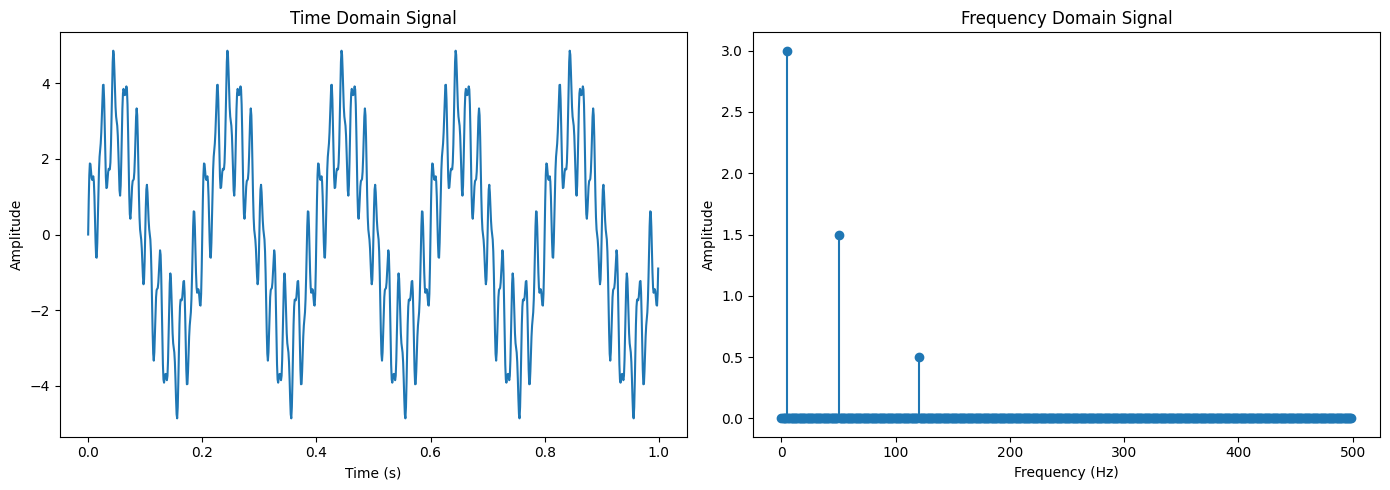

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
sampling_rate = 1000  # samples per second
duration = 1  # seconds
t = np.linspace(0, duration, sampling_rate, endpoint=False)  # 1 second of data

# Frequencies and amplitudes of the sinusoids
frequencies = [5, 50, 120]  # in Hz
amplitudes = [3, 1.5, 0.5]

# Generate the signal by summing the sinusoids
signal = sum(amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(len(frequencies)))

# Perform FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(t), 1/sampling_rate)

# Only plot the positive frequencies
positive_freq_indices = np.where(fft_freq >= 0)
fft_freq = fft_freq[positive_freq_indices]
fft_amplitude = np.abs(fft_result[positive_freq_indices]) / len(t)

# Adjusted FFT amplitude scaling to match the time-domain signal
fft_amplitude_corrected = (2 / len(t)) * np.abs(fft_result[positive_freq_indices])

# Plotting
plt.figure(figsize=(14, 5))

# Time domain plot
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Frequency domain plot (with corrected amplitude scaling)
plt.subplot(1, 2, 2)
plt.stem(fft_freq, fft_amplitude_corrected, basefmt=" ")
plt.title("Frequency Domain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

# Show plots
plt.tight_layout()
plt.show()

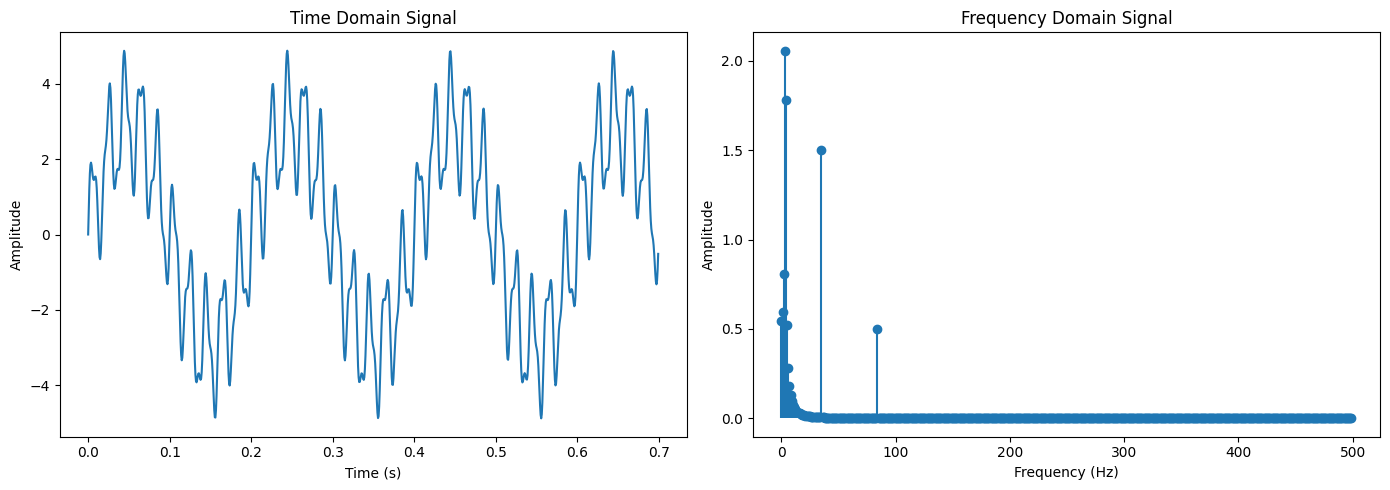

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
sampling_rate = 1000  # samples per second
duration = .7  # seconds
t = np.linspace(0, duration, sampling_rate, endpoint=False)  # 1 second of data

# Frequencies and amplitudes of the sinusoids
frequencies = [5, 50, 120]  # in Hz
amplitudes = [3, 1.5, 0.5]

# Generate the signal by summing the sinusoids
signal = sum(amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(len(frequencies)))

# Perform FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(t), 1/sampling_rate)

# Only plot the positive frequencies
positive_freq_indices = np.where(fft_freq >= 0)
fft_freq = fft_freq[positive_freq_indices]
fft_amplitude = np.abs(fft_result[positive_freq_indices]) / len(t)

# Adjusted FFT amplitude scaling to match the time-domain signal
fft_amplitude_corrected = (2 / len(t)) * np.abs(fft_result[positive_freq_indices])

# Plotting
plt.figure(figsize=(14, 5))

# Time domain plot
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Frequency domain plot (with corrected amplitude scaling)
plt.subplot(1, 2, 2)
plt.stem(fft_freq, fft_amplitude_corrected, basefmt=" ")
plt.title("Frequency Domain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

# Show plots
plt.tight_layout()
plt.show()


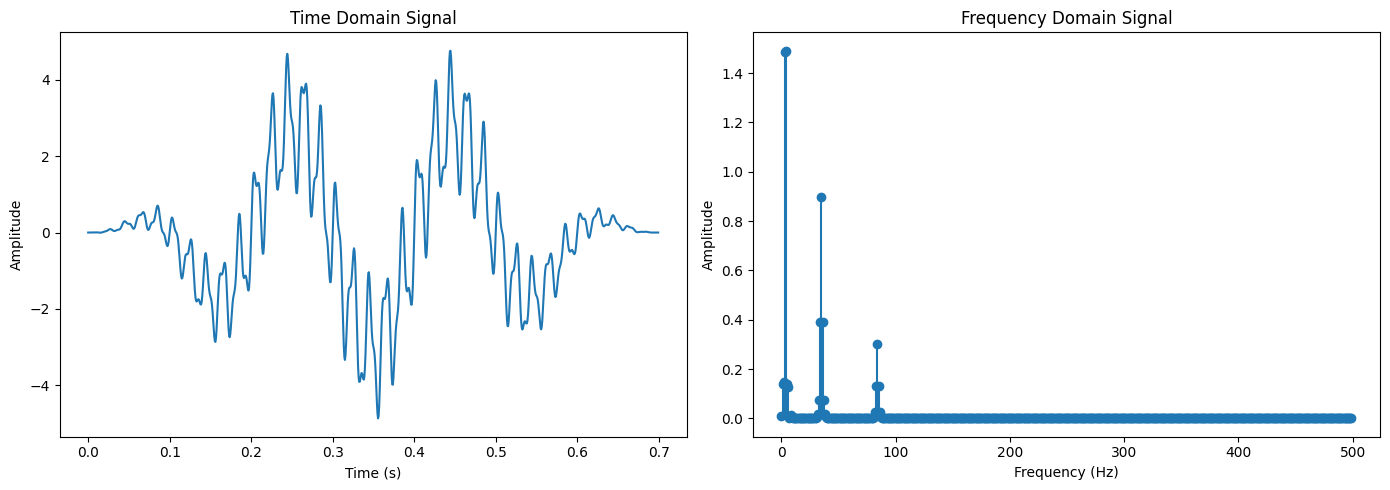

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import tukey

# Signal parameters
sampling_rate = 1000  # samples per second
duration = .7  # seconds
t = np.linspace(0, duration, sampling_rate, endpoint=False)  # 1 second of data

# Frequencies and amplitudes of the sinusoids
frequencies = [5, 50, 120]  # in Hz
amplitudes = [3, 1.5, 0.5]

# Generate the signal by summing the sinusoids
signal = sum(amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(len(frequencies)))
# apply Tukey window
signal = signal * tukey(len(signal), alpha=0.8)

# Perform FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(t), 1/sampling_rate)

# Only plot the positive frequencies
positive_freq_indices = np.where(fft_freq >= 0)
fft_freq = fft_freq[positive_freq_indices]
fft_amplitude = np.abs(fft_result[positive_freq_indices]) / len(t)

# Adjusted FFT amplitude scaling to match the time-domain signal
fft_amplitude_corrected = (2 / len(t)) * np.abs(fft_result[positive_freq_indices])



# Plotting
plt.figure(figsize=(14, 5))

# Time domain plot
plt.subplot(1, 2, 1)
plt.plot(t, signal)
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Frequency domain plot (with corrected amplitude scaling)
plt.subplot(1, 2, 2)
plt.stem(fft_freq, fft_amplitude_corrected, basefmt=" ")
plt.title("Frequency Domain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

# Show plots
plt.tight_layout()
plt.show()


Accuracy: 85.00%


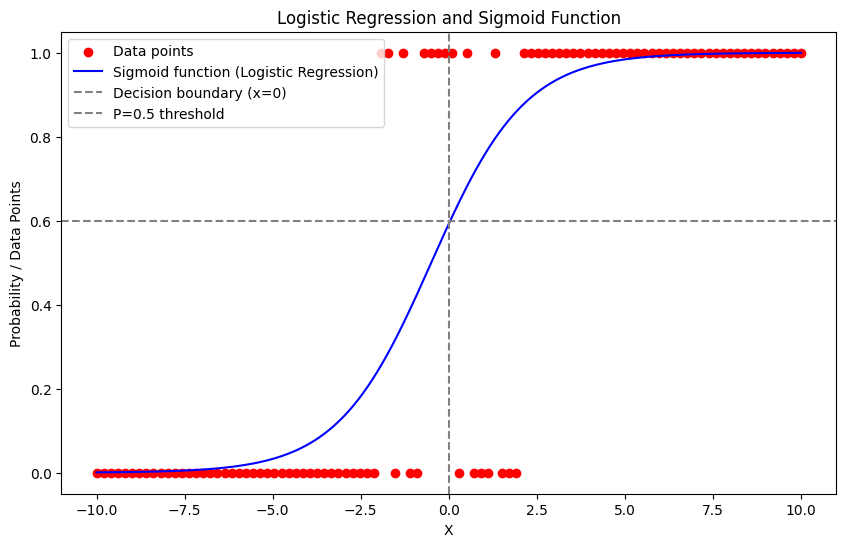

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Generate random data
np.random.seed(0)  # For reproducibility
X = np.linspace(-10, 10, 100)  # 100 evenly spaced values between -10 and 10
y = (X > 0).astype(int)  # Class labels based on whether the value is greater than 0


flip_mask = (X > -2) & (X < 2)  # Identify points near the boundary
random_flip = np.random.rand(len(X)) < 0.5  # 50% chance of flipping

y = np.where(flip_mask & random_flip, 1 - y, y)


# Reshape X to be a 2D array for scikit-learn
X = X.reshape(-1, 1)

# Step 2: Train a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 3: Plot the sigmoid function and data points
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(X, y, color='red', label='Data points')

# Plot the sigmoid curve (logistic regression model)
X_curve = np.linspace(-10, 10, 300).reshape(-1, 1)
y_curve = model.predict_proba(X_curve)[:, 1]  # Probability estimates for the positive class (1)
plt.plot(X_curve, y_curve, label='Sigmoid function (Logistic Regression)', color='blue')

# Plotting settings
plt.axvline(x=0, color='gray', linestyle='--', label='Decision boundary (x=0)')
plt.axhline(y=0.6, color='gray', linestyle='--', label='P=0.5 threshold')
plt.title('Logistic Regression and Sigmoid Function')
plt.xlabel('X')
plt.ylabel('Probability / Data Points')
plt.legend()
plt.show()


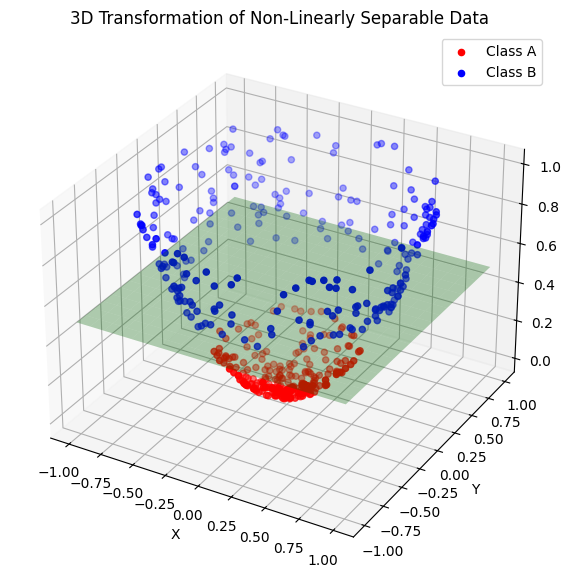

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate 2D circular data
np.random.seed(0)
num_points = 500

# Inner circle (Class A)
theta = np.random.rand(num_points // 2) * 2 * np.pi
r = np.random.rand(num_points // 2) * 0.5  # smaller radius for class A
x_inner = r * np.cos(theta)
y_inner = r * np.sin(theta)

# Outer ring (Class B)
theta = np.random.rand(num_points // 2) * 2 * np.pi
r = 0.7 + np.random.rand(num_points // 2) * 0.3  # larger radius for class B
x_outer = r * np.cos(theta)
y_outer = r * np.sin(theta)

# Combine the points
x = np.hstack((x_inner, x_outer))
y = np.hstack((y_inner, y_outer))
labels = np.hstack((np.zeros(num_points // 2), np.ones(num_points // 2)))

# Transform the 2D data into 3D
# Class A points (inner circle) will be lifted upwards to form a hill
z = x**2 + y**2  # quadratic transformation for the hill

# Plotting the 3D transformed data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[labels == 0], y[labels == 0], z[labels == 0], color='red', label='Class A')
ax.scatter(x[labels == 1], y[labels == 1], z[labels == 1], color='blue', label='Class B')

# Plotting a linear decision boundary (a plane) that separates the classes
xx, yy = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
zz = np.full_like(xx, 0.5)  # Simple plane (constant z) separating the classes
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Transformation of Non-Linearly Separable Data')
ax.legend()

plt.show()



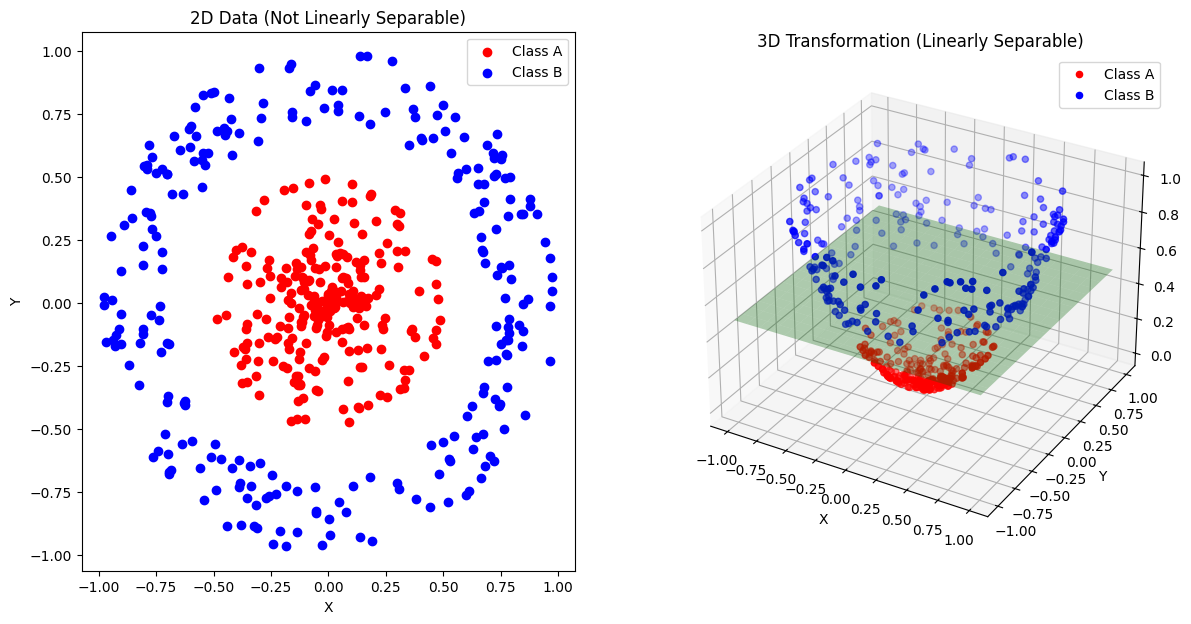

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting the 2D and 3D side by side
fig = plt.figure(figsize=(14, 7))

# Subplot 1: 2D Data
ax1 = fig.add_subplot(121)
ax1.scatter(x[labels == 0], y[labels == 0], color='red', label='Class A')
ax1.scatter(x[labels == 1], y[labels == 1], color='blue', label='Class B')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('2D Data (Not Linearly Separable)')
ax1.legend()

# Subplot 2: 3D Transformed Data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x[labels == 0], y[labels == 0], z[labels == 0], color='red', label='Class A')
ax2.scatter(x[labels == 1], y[labels == 1], z[labels == 1], color='blue', label='Class B')

# Plotting a linear decision boundary (a plane) that separates the classes
xx, yy = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))
zz = np.full_like(xx, 0.5)  # Simple plane (constant z) separating the classes
ax2.plot_surface(xx, yy, zz, alpha=0.3, color='green')

# Set labels for 3D plot
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('3D Transformation (Linearly Separable)')
ax2.legend()

plt.show()


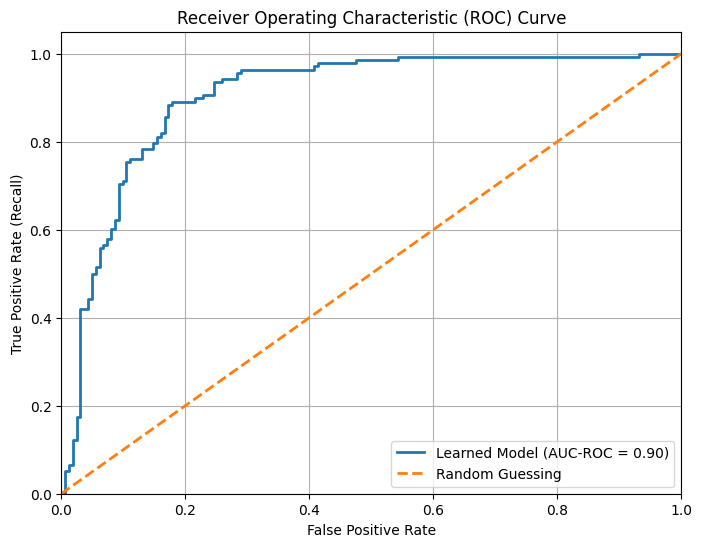

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# 1. Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Get the predicted probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]  # We take the probability of the positive class

# 5. Compute the ROC curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 6. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'Learned Model (AUC-ROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The cells below are mostly written by me. Large Language Models have not been used to the same extend as the previous cells

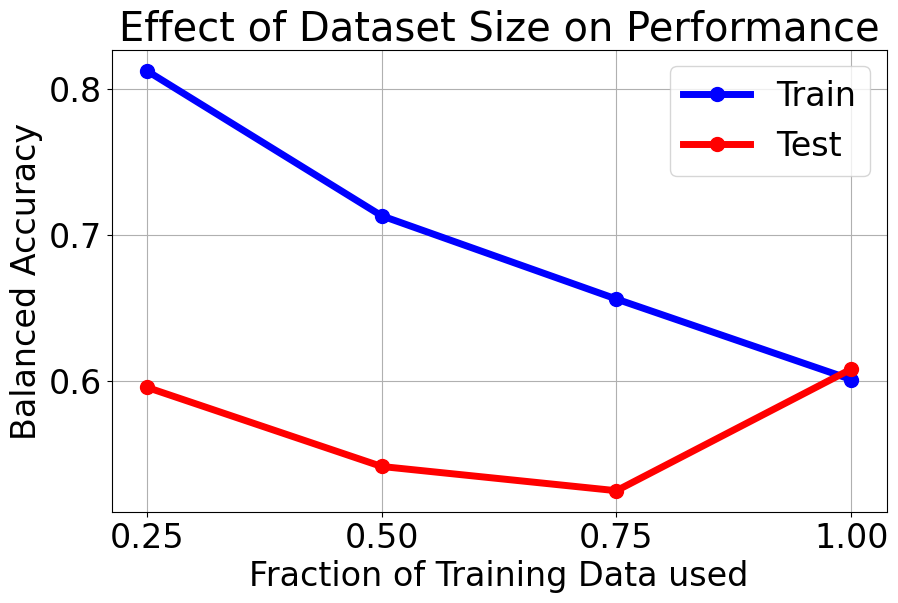

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# font size
plt.rcParams.update({'font.size': 24})

# this is to make a plot showing how different training sizes affect train and test accuracy

# creating the dataset
fractions = [0.25, 0.5, 0.75, 1.0]
train_accuracies_time_domain = [0.8125, 0.7132, 0.6562, 0.6011]
test_accuracies_time_domain = [0.5958, 0.5416, 0.525, 0.6083]

train_accuracies_freq_domain = [1.0, 1.0, 1.0, 1.0]
test_accuracies_freq_domain = [0.3625, 0.4458, 0.475, 0.6083]

# plotting only show the available x values
plt.figure(figsize=(10, 6))

plt.plot(fractions, train_accuracies_time_domain, marker='o', label='Train', color='blue', linewidth=5, markersize = 10)
plt.plot(fractions, test_accuracies_time_domain, marker='o', label='Test', color='red', linewidth = 5, markersize = 10)

#plt.plot(fractions, train_accuracies_freq_domain, marker='o', label='Train (Frequency Domain)', color='green')
#plt.plot(fractions, test_accuracies_freq_domain, marker='o', label='Test (Frequency Domain)', color='purple')

plt.title('Effect of Dataset Size on Performance')
plt.xticks(fractions)
plt.xlabel('Fraction of Training Data used')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# next line show how to increase marker size





[-0.25625009  0.86112061]


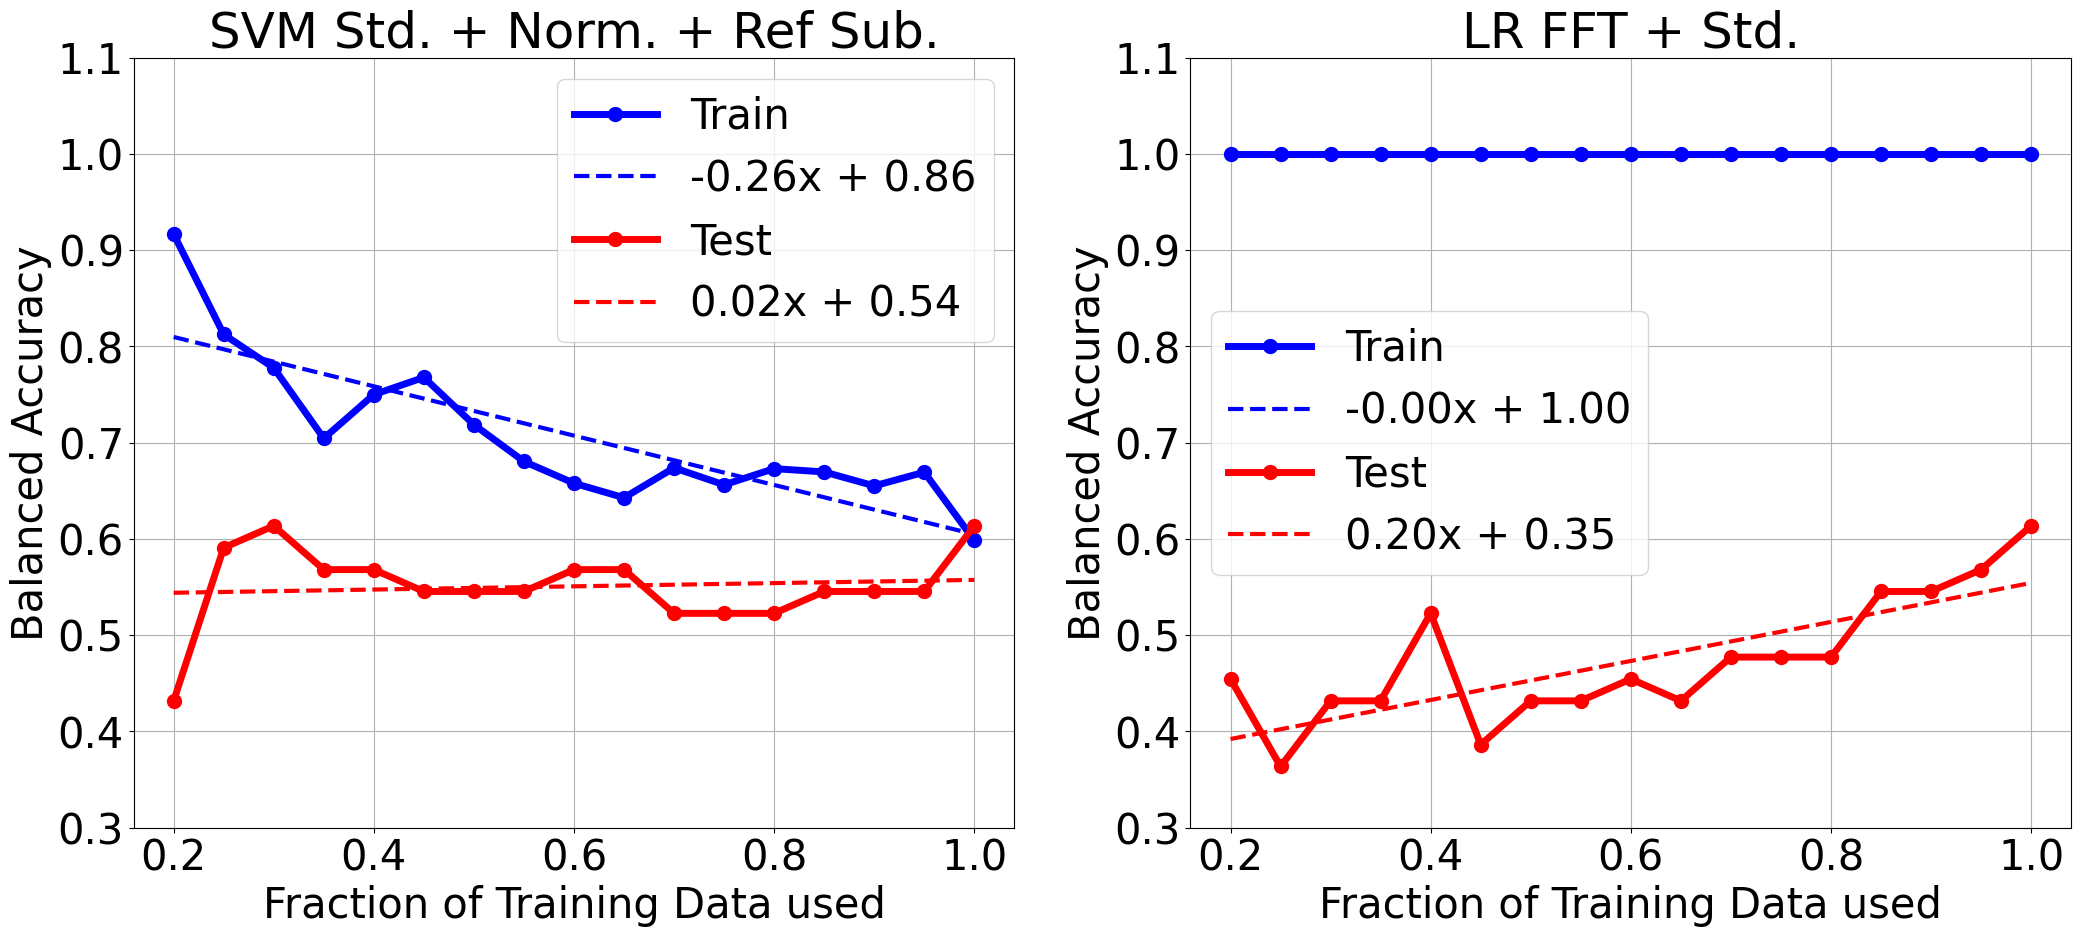

In [60]:
# The same as above but with more fractions and error bars

import numpy as np
import matplotlib.pyplot as plt

# font size
plt.rcParams.update({'font.size': 30})

# this is to make a plot showing how different training sizes affect train and test accuracy

# creating the dataset
fractions = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
fractions_shiftet_slightly = [x + 0.001 for x in fractions]
train_accuracies_time_domain = [0.9166666666666667, 0.8125, 0.7777777777777777, 0.7045454545454545, 0.75, 0.7678571428571428, 0.71875, 0.6805555555555556, 0.6578947368421052, 0.6428571428571428, 0.6739130434782609, 0.65625, 0.6730769230769231, 0.6696428571428572, 0.6551724137931034, 0.6693548387096774, 0.5984848484848485]
train_accuracies_time_domain_std = [0.08333333333333331, 0.13975424859373686, 0.1111111111111111, 0.07537783614444094, 0.08382497968347448, 0.09278843611976124, 0.11267347735824966, 0.04606423319938053, 0.07894736842105263, 0.08584645893961876, 0.0783815494666085, 0.045405197328548676, 0.03330866937632454, 0.058548558252696455, 0.04876598490941709, 0.047710320831448515, 0.049677564578045466]
test_accuracies_time_domain = [0.43181818181818177, 0.5909090909090909, 0.6136363636363636, 0.5681818181818181, 0.5681818181818181, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5681818181818181, 0.5681818181818181, 0.5227272727272727, 0.5227272727272727, 0.5227272727272727, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.6136363636363636]
test_accuracies_time_domain_std = [0.16230519155779202, 0.10163945352271772, 0.13445635870680947, 0.07537783614444091, 0.1745714942697411, 0.09090909090909091, 0.19284730395996752, 0.20327890704543544, 0.23509273710883183, 0.23509273710883183, 0.1745714942697411, 0.1745714942697411, 0.2070553086169159, 0.24896479886598458, 0.24896479886598458, 0.28020063649858984, 0.19682395540555422]

train_accuracies_freq_domain = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
train_accuracies_freq_domain_std = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
test_accuracies_freq_domain = [0.45454545454545453, 0.36363636363636365, 0.43181818181818177, 0.43181818181818177, 0.5227272727272727, 0.38636363636363635, 0.4318181818181819, 0.43181818181818177, 0.45454545454545453, 0.4318181818181818, 0.4772727272727273, 0.4772727272727273, 0.4772727272727273, 0.5454545454545454, 0.5454545454545454, 0.5681818181818181, 0.6136363636363636]
test_accuracies_freq_domain_std = [0.11134044285378081, 0.11134044285378081, 0.07537783614444088, 0.11809437324333252, 0.18603074481528298, 0.039364791081110836, 0.1745714942697411, 0.13445635870680944, 0.09090909090909088, 0.039364791081110836, 0.07537783614444088, 0.07537783614444088, 0.039364791081110836, 0.0642824346533225, 0.0642824346533225, 0.07537783614444091, 0.07537783614444094]

regression_train_time = np.polyfit(fractions, train_accuracies_time_domain, 1)
regression_line_train_time = np.polyval(regression_train_time, fractions)
print(regression_train_time)

regression_test_time = np.polyfit(fractions, test_accuracies_time_domain, 1)
regression_line_test_time = np.polyval(regression_test_time, fractions)

regression_train_freq = np.polyfit(fractions, train_accuracies_freq_domain, 1)
regression_line_train_freq = np.polyval(regression_train_freq, fractions)

regression_test_freq = np.polyfit(fractions, test_accuracies_freq_domain, 1)
regression_line_test_freq = np.polyval(regression_test_freq, fractions)


# making two subplots, the first one being for time domain, and the second one for frequency domain
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

axs[0].plot(fractions, train_accuracies_time_domain, marker='o', label='Train', color='blue', linewidth=5, markersize = 10)
axs[0].plot(fractions, regression_line_train_time, color='blue', linestyle='--', label=f"{regression_train_time[0]:.2f}x + {regression_train_time[1]:.2f}", linewidth=3)


axs[0].plot(fractions, test_accuracies_time_domain, marker='o', label='Test', color='red', linewidth = 5, markersize = 10)
axs[0].plot(fractions, regression_line_test_time, color='red', linestyle='--', label=f"{regression_test_time[0]:.2f}x + {regression_test_time[1]:.2f}", linewidth=3)


axs[0].set_title('SVM Std. + Norm. + Ref Sub.')
axs[0].set_xlabel('Fraction of Training Data used')
axs[0].set_ylim([0.3,1.1])


axs[1].plot(fractions, train_accuracies_freq_domain, marker='o', label='Train', color='blue', linewidth=5, markersize = 10) 
axs[1].plot(fractions, regression_line_train_freq, color='blue', linestyle='--', label=f"{regression_train_freq[0]:.2f}x + {regression_train_freq[1]:.2f}", linewidth=3)


axs[1].plot(fractions, test_accuracies_freq_domain, marker='o', label='Test', color='red', linewidth = 5, markersize = 10)
axs[1].plot(fractions, regression_line_test_freq, color='red', linestyle='--', label=f"{regression_test_freq[0]:.2f}x + {regression_test_freq[1]:.2f}", linewidth=3)


axs[1].set_title('LR FFT + Std.')
axs[1].set_xlabel('Fraction of Training Data used')
axs[1].set_ylim([0.3,1.1])

for ax in axs:
    ax.set_ylabel('Balanced Accuracy')
    ax.legend()
    ax.grid(True)

plt.show()




